# 0. Introduction
Welcome to the Risk-Parity Portfolio Analysis project! In this project, you'll explore the concept of risk-parity, a popular portfolio management strategy that aims to allocate investments in a way that equalizes the risk contribution of each asset. This approach is widely used by hedge funds and institutional investors to create more balanced portfolios that are less sensitive to market volatility.

Throughout this project, you'll learn how to download financial data for various assets, calculate returns, and compute risk-parity weights using Python. By the end, you'll evaluate the performance of your risk-parity portfolio through key financial metrics such as annualized return, volatility, and Sharpe ratio. This hands-on experience will deepen your understanding of portfolio management and give you practical skills in financial data analysis. Whether you're new to finance or looking to enhance your quantitative finance skills, this project provides a solid foundation in risk-parity strategies and their application in real-world scenarios.

## Getting Started: Tips and Instructions

1. **Familiarize Yourself with the Notebook Structure:**
   - The notebook is organized into clearly defined sections, each focusing on a specific aspect of the risk-parity portfolio analysis. Take a moment to glance through the sections to understand the overall workflow.

2. **Review the Data:**
   - Since the data is already available, start by exploring the initial few cells to understand the data structure and what each column represents. This will give you context for the calculations and analysis you'll be performing.

3. **Run Cells Sequentially:**
   - Work through the notebook by executing each code cell in order. This will help you build your analysis step by step and ensure that each part of the project is functioning as expected.

4. **Experiment with Parameters:**
   - Feel free to tweak parameters such as the rolling window size for calculating risk-parity weights or adjust the assets included in the portfolio. Experimenting will help deepen your understanding of how these factors influence portfolio performance.

5. **Leverage the Plots:**
   - Use the generated plots to visually assess the impact of your calculations. The visualizations are crucial for understanding the risk-parity approach and how different assets contribute to the portfolio.

6. **Reflect:**
   - As you work through the notebook, consider why each step is necessary and how it contributes to the overall goal of building a risk-parity portfolio. If something isn’t clear, take a moment to reflect or explore additional resources.

Enjoy the process of exploring risk-parity strategies, and don't hesitate to dive deeper into the data or code to enhance your learning experience!

# 1. Import Libraries

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Download Financial Data
We will download front-month futures data for S&P500, 10-year Treasuries, gold, and US dollar using the `yfinance` library.

In [2]:
# Download front-month futures data
symbols = [
    "ES=F",  # S&P 500
    "ZN=F",  # 10-Year Treasury Note
    "GC=F",  # Gold
    "DX=F",  # US Dollar Index
    # Additional commodities
    # "CL=F",  # Crude Oil
    # "NG=F",  # Natural Gas
    # "SI=F",  # Silver
    # "HG=F",  # Copper
]
data = yf.download(symbols, auto_adjust=False)

[*********************100%***********************]  4 of 4 completed


In [3]:
data

Price        Adj Close                                         Close           \
Ticker            DX=F     ES=F         GC=F        ZN=F        DX=F     ES=F   
Date                                                                            
2000-06-22  107.400002      NaN          NaN         NaN  107.400002      NaN   
2000-06-23  107.720001      NaN          NaN         NaN  107.720001      NaN   
2000-06-26  107.769997      NaN          NaN         NaN  107.769997      NaN   
2000-06-27  106.980003      NaN          NaN         NaN  106.980003      NaN   
2000-06-28  107.250000      NaN          NaN         NaN  107.250000      NaN   
...                ...      ...          ...         ...         ...      ...   
2025-06-09   98.905998  6010.25  3332.100098  110.171875   98.905998  6010.25   
2025-06-10   99.070000  6045.00  3320.899902  110.218750   99.070000  6045.00   
2025-06-11   98.603996  6029.00  3321.300049  110.687500   98.603996  6029.00   
2025-06-12   97.901001  6049.50  3380.899902  111.046875   97.901001  6049.50   
2025-06-13   98.176003  5979.25  3431.199951  110.625000   98.176003  5979.25   

Price                                      High           ...          Low  \
Ticker             GC=F        ZN=F        DX=F     ES=F  ...         GC=F   
Date                                                      ...                
2000-06-22          NaN         NaN  107.639999      NaN  ...          NaN   
2000-06-23          NaN         NaN  107.879997      NaN  ...          NaN   
2000-06-26          NaN         NaN  108.260002      NaN  ...          NaN   
2000-06-27          NaN         NaN  107.849998      NaN  ...          NaN   
2000-06-28          NaN         NaN  107.599998      NaN  ...          NaN   
...                 ...         ...         ...      ...  ...          ...   
2025-06-09  3332.100098  110.171875   99.190002  6027.75  ...  3290.000000   
2025-06-10  3320.899902  110.218750   99.364998  6049.50  ...  3302.000000   
2025-06-11  3321.300049  110.687500   99.199997  6074.75  ...  3321.300049   
2025-06-12  3380.899902  111.046875   98.514999  6051.25  ...  3353.399902   
2025-06-13  3431.199951  110.625000   98.584999  6045.00  ...  3407.300049   

Price                         Open                                     Volume  \
Ticker            ZN=F        DX=F     ES=F         GC=F        ZN=F     DX=F   
Date                                                                            
2000-06-22         NaN  107.099998      NaN          NaN         NaN    666.0   
2000-06-23         NaN  107.430000      NaN          NaN         NaN    258.0   
2000-06-26         NaN  107.680000      NaN          NaN         NaN    266.0   
2000-06-27         NaN  107.849998      NaN          NaN         NaN    669.0   
2000-06-28         NaN  107.059998      NaN          NaN         NaN    258.0   
...                ...         ...      ...          ...         ...      ...   
2025-06-09  109.984375   99.150002  6010.00  3315.600098  109.984375  21069.0   
2025-06-10  110.187500   98.930000  6012.25  3302.000000  110.187500  18693.0   
2025-06-11  110.031250   98.949997  6038.75  3328.000000  110.281250  33548.0   
2025-06-12  110.718750   98.455002  6022.25  3363.000000  110.765625  25602.0   
2025-06-13  110.453125   97.684998  6045.00  3407.300049  111.296875  25602.0   

Price                                  
Ticker           ES=F    GC=F    ZN=F  
Date                                   
2000-06-22        NaN     NaN     NaN  
2000-06-23        NaN     NaN     NaN  
2000-06-26        NaN     NaN     NaN  
2000-06-27        NaN     NaN     NaN  
2000-06-28        NaN     NaN     NaN  
...               ...     ...     ...  
2025-06-09   912371.0  1887.0   616.0  
2025-06-10  1104373.0    65.0  1149.0  
2025-06-11  1610313.0  2106.0  1756.0  
2025-06-12  1330953.0  1818.0  4180.0  
2025-06-13  1330953.0  1818.0  4180.0  

[6322 rows x 24 columns]

### 3. Resample Data

In this section, we aim to reduce the noise in the daily financial data by resampling it to a monthly frequency. Resampling is a common technique in time series analysis, allowing us to aggregate data points over a specified time period. This helps in smoothing out short-term fluctuations and making the data more manageable for analysis.


In [4]:
# Resample data to monthly frequency
data = data.resample("ME").mean()
# Convert index to datetime
if not pd.api.types.is_datetime64_ns_dtype(data.resample("ME").mean().index):
    data.index = pd.to_datetime(data.resample("ME").mean().index)

In [5]:
data

Price        Adj Close                                             Close  \
Ticker            DX=F         ES=F         GC=F        ZN=F        DX=F   
Date                                                                       
2000-06-30  107.180000          NaN          NaN         NaN  107.180000   
2000-07-31  108.050000          NaN          NaN         NaN  108.050000   
2000-08-31  111.046957          NaN   276.099991         NaN  111.046957   
2000-09-30  114.136191  1463.425000   273.389996  100.064739  114.136191   
2000-10-31  115.898181  1403.818182   269.809090  100.848732  115.898181   
...                ...          ...          ...         ...         ...   
2025-02-28  107.255947  6058.131579  2897.115800  109.526316  107.255947   
2025-03-31  103.954762  5698.466657  2986.409528  110.872768  103.954762   
2025-04-30  100.490523  5400.238095  3211.152367  111.374256  100.490523   
2025-05-31   99.949727  5827.809524  3280.738095  110.514881   99.949727   
2025-06-30   98.702700  5997.550000  3355.409985  110.548438   98.702700   

Price                                                   High               \
Ticker             ES=F         GC=F        ZN=F        DX=F         ES=F   
Date                                                                        
2000-06-30          NaN          NaN         NaN  107.611428          NaN   
2000-07-31          NaN          NaN         NaN  108.360500          NaN   
2000-08-31          NaN   276.099991         NaN  111.369131          NaN   
2000-09-30  1463.425000   273.389996  100.064739  114.610952  1475.300000   
2000-10-31  1403.818182   269.809090  100.848732  116.241364  1419.784091   
...                 ...          ...         ...         ...          ...   
2025-02-28  6058.131579  2897.115800  109.526316  107.661316  6092.171053   
2025-03-31  5698.466657  2986.409528  110.872768  104.363809  5759.761905   
2025-04-30  5400.238095  3211.152367  111.374256  101.014048  5493.202381   
2025-05-31  5827.809524  3280.738095  110.514881  100.319319  5863.059524   
2025-06-30  5997.550000  3355.409985  110.548438   99.102499  6023.550000   

Price       ...          Low                    Open               \
Ticker      ...         GC=F        ZN=F        DX=F         ES=F   
Date        ...                                                     
2000-06-30  ...          NaN         NaN  107.275714          NaN   
2000-07-31  ...          NaN         NaN  107.918000          NaN   
2000-08-31  ...   274.349991         NaN  110.902608          NaN   
2000-09-30  ...   273.284996   99.988849  114.077143  1465.125000   
2000-10-31  ...   269.545453  100.688928  115.716364  1404.806818   
...         ...          ...         ...         ...          ...   
2025-02-28  ...  2874.731612  109.165296  107.360789  6059.907895   
2025-03-31  ...  2967.890451  110.617560  104.104286  5718.952381   
2025-04-30  ...  3178.123803  110.946429  100.690001  5394.178571   
2025-05-31  ...  3252.714274  110.223958   99.995909  5814.047619   
2025-06-30  ...  3329.589990  110.325000   98.752000  5986.200000   

Price                                      Volume                             \
Ticker             GC=F        ZN=F          DX=F          ES=F         GC=F   
Date                                                                           
2000-06-30          NaN         NaN    443.571429           NaN          NaN   
2000-07-31          NaN         NaN    657.550000           NaN          NaN   
2000-08-31   274.349991         NaN    652.913043           NaN     0.000000   
2000-09-30   273.534996  100.020090    730.000000  9.636230e+04   214.550000   
2000-10-31   269.995454  100.840918    660.409091  9.587086e+04    14.590909   
...                 ...         ...           ...           ...          ...   
2025-02-28  2897.257902  109.387336  21386.631579  1.618689e+06  2349.473684   
2025-03-31  2976.328555  110.872768  21331.571429  1.920052e+06  8016.238095   
2025-04-3

In [6]:
print(type(data.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


### 4. Clean and Prepare Data

In this step, we will focus on extracting the relevant data, handling missing values, and ensuring the data is ready for analysis. Specifically, we'll subset the adjusted close prices from our dataset, fill any missing values, and drop rows with unknown prices.

#### Steps to Clean and Prepare Data

1. **Subset Adjusted Close Prices**     
2. **Fill Missing Values (NaNs)**
3. **Drop Rows with Remaining NaNs**
4. **Ensure Correct Date Formatting**

By following these steps, we will have a clean dataset of adjusted close prices that is free of missing values and properly formatted for time series analysis.


In [7]:
# Subset adjusted close prices
prices = data["Adj Close"]

In [8]:
prices[prices.isnull().any(axis=1)]

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-06-30,107.180000,NaN,NaN,NaN
2000-07-31,108.050000,NaN,NaN,NaN
2000-08-31,111.046957,NaN,276.099991,NaN


In [9]:
prices.isnull().sum()

Ticker
DX=F    0
ES=F    3
GC=F    2
ZN=F    3
dtype: int64

In [10]:
# Fill NaNs
prices = prices.bfill()

In [11]:
prices.isnull().sum()

Ticker
DX=F    0
ES=F    0
GC=F    0
ZN=F    0
dtype: int64

In [12]:
if prices.isnull().sum().sum() > 0:
    prices.dropna()

In [13]:
# Convert index to datetime
if not pd.api.types.is_datetime64_ns_dtype(data["Adj Close"].index):
    prices.index = pd.to_datetime(data["Adj Close"].index)

In [14]:
display(prices)

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-06-30,107.180000,1463.425000,276.099991,100.064739
2000-07-31,108.050000,1463.425000,276.099991,100.064739
2000-08-31,111.046957,1463.425000,276.099991,100.064739
2000-09-30,114.136191,1463.425000,273.389996,100.064739
2000-10-31,115.898181,1403.818182,269.809090,100.848732
...,...,...,...,...
2025-02-28,107.255947,6058.131579,2897.115800,109.526316
2025-03-31,103.954762,5698.466657,2986.409528,110.872768
2025-04-30,100.490523,5400.238095,3211.152367,111.374256


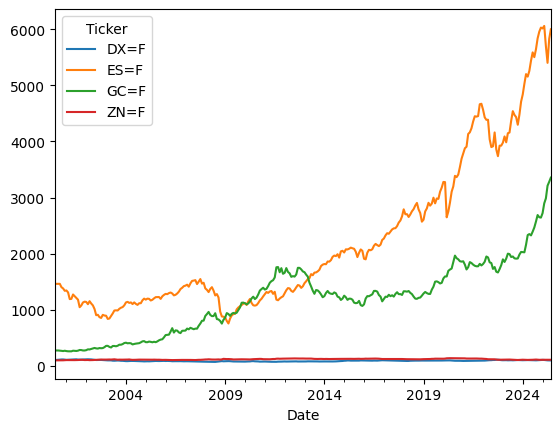

In [15]:
prices.plot()
plt.show()

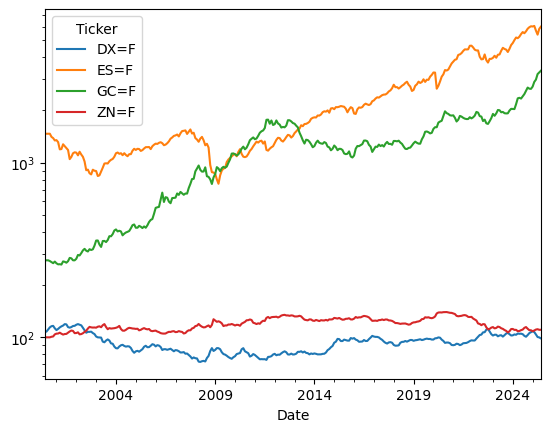

In [16]:
prices.plot()
plt.yscale("log")
plt.show()

### 5. Calculate Returns

In financial analysis, one of the key metrics is the return on an investment, which shows how much the price of an asset has increased or decreased over a certain period. We will calculate the **arithmetic returns** of the adjusted close prices to measure this change over time.

#### Steps to Calculate Arithmetic Returns

1. **Understanding Arithmetic Returns:**
   - Arithmetic returns measure the percentage change in the price of an asset from one period to the next. 
   - The formula for calculating the arithmetic return for a given period is:

     $
     R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
     $
     
     where:
     - $ R_t $ is the return at time $ t $,
     - $ P_t $ is the price at time $ t $,
     - $ P_{t-1} $ is the price at the previous time period.

   - This formula can be simplified to:
     $
     R_t = \frac{P_t}{P_{t-1}} - 1
     $
   - However, in practice, it is common to use the percentage change function provided by Pandas, which handles this calculation efficiently.

2. **Calculate Percentage Change**
3. **Handle Missing Values:**

By following these steps, we will have a series of arithmetic returns that represent the day-to-day percentage changes in the asset's price, which can be used for further analysis such as calculating cumulative returns, volatility, or risk metrics.


In [17]:
all(prices.pct_change() == (prices / prices.shift(1)) - 1)

True

In [18]:
# Compute arithmetic returns
returns = prices.pct_change()
returns = returns.dropna()

In [19]:
display(returns)

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2000-07-31,0.008117,0.000000,0.000000,0.000000
2000-08-31,0.027737,0.000000,0.000000,0.000000
2000-09-30,0.027819,0.000000,-0.009815,0.000000
2000-10-31,0.015438,-0.040731,-0.013098,0.007835
2000-11-30,0.004298,-0.016000,-0.014581,0.003640
...,...,...,...,...
2025-02-28,-0.010898,0.007502,0.063963,0.009972
2025-03-31,-0.030779,-0.059369,0.030822,0.012293
2025-04-30,-0.033324,-0.052335,0.075255,0.004523


### 6. Compute Risk-Parity Weights

Risk-parity is an investment strategy that seeks to allocate portfolio weights in a way that each asset contributes equally to the overall portfolio risk. This method is especially useful in diversifying risk across different assets with varying levels of volatility.

#### Steps to Compute Risk-Parity Weights

1. **Understanding Risk-Parity:**
   - The idea behind risk-parity is to allocate more weight to less volatile assets and less weight to more volatile assets, thereby equalizing the risk contribution of each asset in the portfolio.
   - The weight of each asset in the portfolio is inversely proportional to its volatility.

2. **Calculate Rolling Volatility:**
   - Volatility is a statistical measure of the dispersion of returns for a given security or market index.
     
3. **Compute Inverse Volatility:**
4. **Normalize Weights:**
   - Once we have the inverse volatilities, we normalize them so that the sum of the weights for each time period equals 1. This ensures that we have a proper weight distribution across assets.
   - We achieve this by dividing the inverse volatility of each asset by the sum of the inverse volatilities across all assets for each time period.
     
5. **Shift Weights for Practical Application:**
   - In a real-world scenario, we can only make investment decisions based on information that is available at the time of making the decision. Therefore, we shift the computed weights by one period to ensure that the weights at time $ t $ are based on data up to $ t-1 $.      - This shift ensures that the weights applied are based on historical data up to the previous period, which is crucial for avoiding look-ahead bias.

By following these steps, we generate a time series of risk-parity weights that can be used to allocate assets in a way that balances the risk across the portfolio. The resulting weights adapt dynamically based on the rolling volatility, ensuring that each asset contributes equally to the overall risk over time.


In [20]:
def compute_risk_parity_weights(
    returns: pd.DataFrame, window_size: int = 36
) -> pd.DataFrame:
    # Compute rolling volatility (std deviation over the window)
    rolling_vol = returns.rolling(window=window_size).std()

    # Compute inverse volatility
    rolling_inverse_vol = 1 / rolling_vol

    # Normalize inverse vol to get weights
    risk_parity_weights = rolling_inverse_vol.div(
        rolling_inverse_vol.sum(axis=1), axis=0
    )

    # Shift weights by 1 period to avoid look-ahead bias
    risk_parity_weights = risk_parity_weights.shift(1)

    # Drop na rows left after rolling window application
    risk_parity_weights = risk_parity_weights.dropna()

    return risk_parity_weights


risk_parity_weights = compute_risk_parity_weights(returns, 36)

In [21]:
all(round(risk_parity_weights.sum(axis=1), 4) == 1)

True

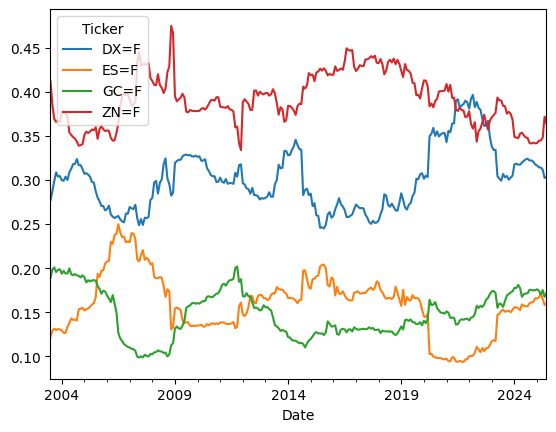

In [22]:
risk_parity_weights.plot()
plt.show()

### 7. Calculate Weighted Returns

Once we have determined the risk-parity weights, the next step is to calculate the weighted returns for each asset and then aggregate them to obtain the portfolio returns. This process allows us to understand how the risk-parity allocation strategy would have performed over time.

#### Steps to Calculate Weighted Returns

1. **Understanding Weighted Returns:**
   - The weighted return of an asset is calculated by multiplying its individual return by the corresponding weight in the portfolio. 
   - The total portfolio return at any given time is the sum of the weighted returns of all assets.

2. **Apply Weights to Returns:**
   - We will multiply the returns of each asset by its corresponding risk-parity weight for each time period. This will give us the weighted return for each asset.
3. **Handle Missing Data:**
   - We drop any rows with missing values (`NaN`) that may result from the multiplication process. This ensures that we only consider time periods with complete data.
4. **Aggregate Weighted Returns:**
   - To calculate the portfolio's return at each time period, sum the weighted returns across all assets. This gives the overall return of the portfolio for each time period.

#### Mathematical Representation:

Given the returns $ r_{i,t} $ for asset $ i $ at time $ t $, and the risk-parity weight $ w_{i,t} $ for asset $ i $ at time $ t $, the weighted return for asset $ i $ at time $ t $ is:

$ r_{i,t}^{weighted} = r_{i,t} \times w_{i,t} $

The total portfolio return at time $ t $ is the sum of the weighted returns for all assets:

$
R_{portfolio,t} = \sum_{i=1}^{n} r_{i,t}^{weighted}
$

Where $ n $ is the number of assets in the portfolio.

By following these steps, we obtain the portfolio returns that reflect the performance of the risk-parity strategy over time. This provides insights into how well the strategy balanced risk across different market conditions.


In [23]:
# Multiply returns by corresponding weights
weighted_returns = returns * risk_parity_weights

# Drop rows with missing values (returns has more rows than weights, because of the rolling window)
weighted_returns = weighted_returns.dropna()

# Aggregate weighted returns to get total portfolio return
risk_parity_portfolio_returns = weighted_returns.sum(axis=1)

In [24]:
weighted_returns

Ticker,DX=F,ES=F,GC=F,ZN=F
Date,,,,
2003-07-31,0.006451,0.000422,-0.002843,-0.015536
2003-08-31,0.004272,-0.000372,0.005343,-0.011096
2003-09-30,-0.004405,0.003983,0.010461,0.005560
2003-10-31,-0.011524,0.002451,-0.000225,-0.002329
2003-11-30,-0.001114,0.001450,0.005731,0.000787
...,...,...,...,...
2025-02-28,-0.003427,0.001249,0.011153,0.003437
2025-03-31,-0.009669,-0.010154,0.005236,0.004240
2025-04-30,-0.010395,-0.008636,0.013177,0.001574


In [25]:
display(risk_parity_portfolio_returns)

Date
2003-07-31   -0.011507
2003-08-31   -0.001852
2003-09-30    0.015598
2003-10-31   -0.011626
2003-11-30    0.006855
                ...   
2025-02-28    0.012412
2025-03-31   -0.010347
2025-04-30   -0.004279
2025-05-31    0.011659
2025-06-30    0.004900
Freq: ME, Length: 264, dtype: float64

In [26]:
returns["Aggregated weighted returns"] = risk_parity_portfolio_returns
returns = returns.dropna()
display(returns)

Ticker,DX=F,ES=F,GC=F,ZN=F,Aggregated weighted returns
Date,,,,,
2003-07-31,0.023288,0.003458,-0.015057,-0.037687,-0.011507
2003-08-31,0.014873,-0.002885,0.026937,-0.028784,-0.001852
2003-09-30,-0.014740,0.030347,0.052112,0.015061,0.015598
2003-10-31,-0.037331,0.018902,-0.001150,-0.006362,-0.011626
2003-11-30,-0.003664,0.011081,0.028919,0.002145,0.006855
...,...,...,...,...,...
2025-02-28,-0.010898,0.007502,0.063963,0.009972,0.012412
2025-03-31,-0.030779,-0.059369,0.030822,0.012293,-0.010347
2025-04-30,-0.033324,-0.052335,0.075255,0.004523,-0.004279


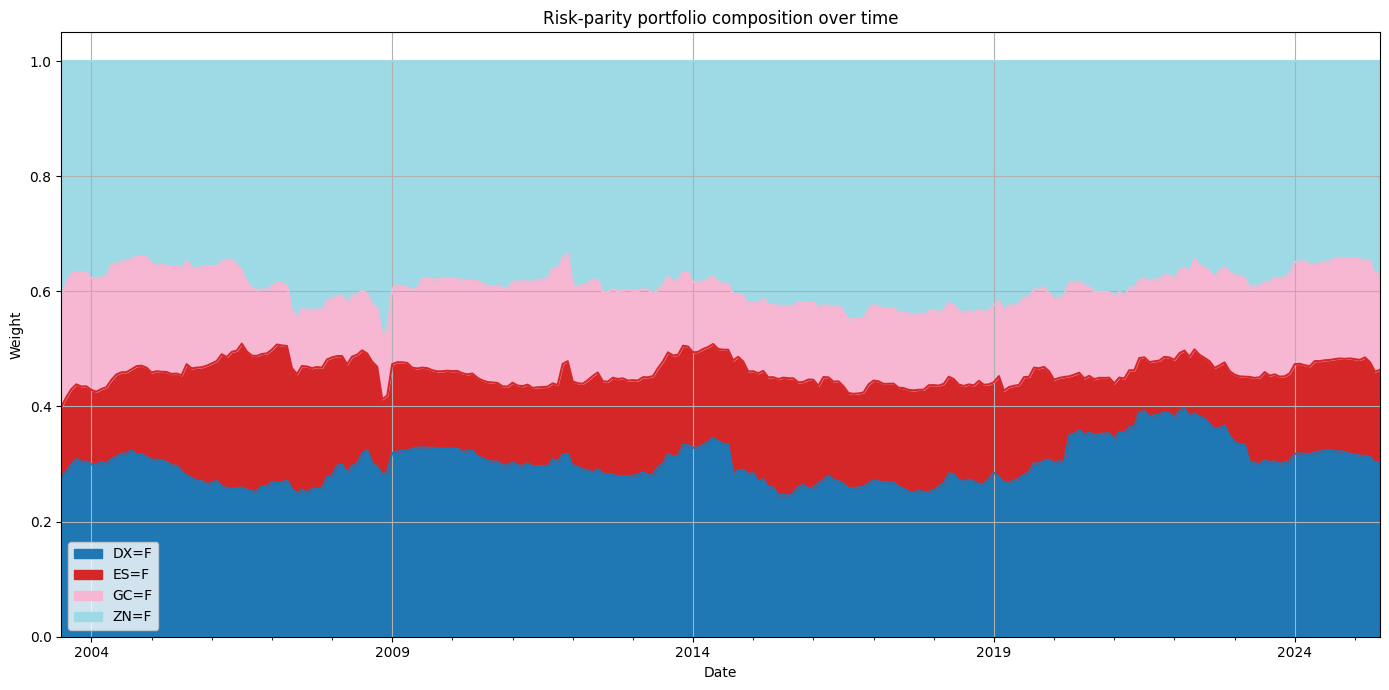

In [27]:
risk_parity_weights.plot.area(figsize=(14, 7), cmap="tab20")
plt.title("Risk-parity portfolio composition over time")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

### 8. Evaluate Portfolio Performance

To assess the performance of the risk-parity portfolio, we will compute several key financial metrics. These metrics will help us understand the portfolio's return, risk, and overall performance characteristics. Below are the details of the metrics we will calculate, along with the functions used and their corresponding arguments.

1. **Annualized Mean Return**
   - **Description:** The average return of the portfolio on an annual basis. This is useful for understanding the long-term growth rate of the portfolio.
2. **Annualized Volatility**
   - **Description:** A measure of the portfolio's return volatility on an annual basis, indicating the degree of variation in returns.
   - **Formula:** 
     $
     \text{Annualized Volatility} = \text{Standard Deviation of Monthly Returns} \times \sqrt{12}
     $
3. **Skewness**
   - **Description:** Skewness measures the asymmetry of the return distribution. Positive skewness indicates a distribution with a longer right tail, while negative skewness indicates a longer left tail.
4. **Kurtosis**
   - **Description:** Kurtosis measures the "tailedness" of the return distribution. High kurtosis indicates a distribution with heavy tails and a sharp peak.
5. **Maximum Drawdown**
   - **Description:** The maximum observed loss from a peak to a trough of the portfolio's cumulative returns, before a new peak is attained.
   - **Formula:** 
     $
     \text{Drawdown} = \frac{\text{Cumulative Return} - \text{Running Maximum}}{\text{Running Maximum}}
     $
6. **Sharpe Ratio**
   - **Description:** The Sharpe Ratio measures the risk-adjusted return of the portfolio, calculated as the ratio of the portfolio's excess return (over the risk-free rate, typically assumed to be 0 in this case) to its volatility.
   - **Formula:** 
     $
     \text{Sharpe Ratio} = \frac{\text{Annualized Mean Return}}{\text{Annualized Volatility}}
     $
7. **Sortino Ratio**
   - **Description:** The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility, thus providing a better measure of risk-adjusted return for portfolios that have asymmetric return distributions.
   - **Formula:** 
     $
     \text{Sortino Ratio} = \frac{\text{Annualized Mean Return}}{\text{Downside Volatility}}
     $
8. **Calmar Ratio**
   - **Description:** The Calmar Ratio measures the risk-adjusted return of a portfolio by comparing the annualized return to the maximum drawdown, providing insight into performance relative to the worst-case scenario.
   - **Formula:** 
     $
     \text{Calmar Ratio} = \frac{\text{Annualized Mean Return}}{-\text{Maximum Drawdown}}
     $

After calculating these metrics, we will display the results to evaluate the performance of the risk-parity portfolio comprehensively.


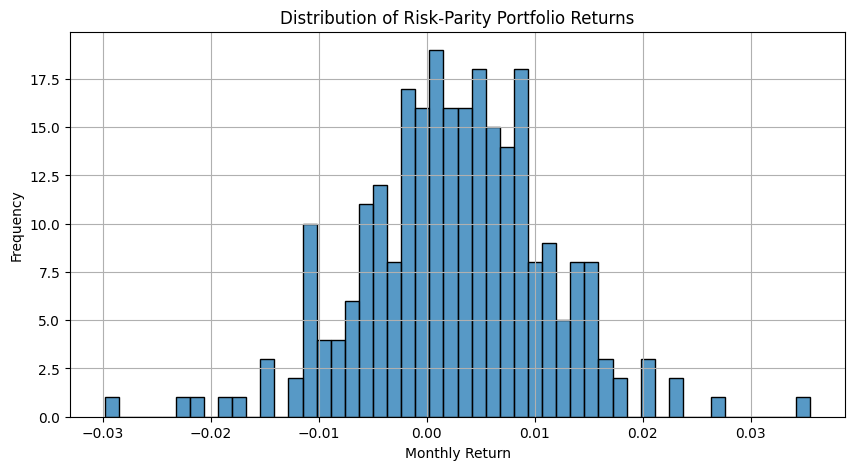

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(risk_parity_portfolio_returns, bins=50)
plt.title("Distribution of Risk-Parity Portfolio Returns")
plt.xlabel("Monthly Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [29]:
# Evaluate portfolio performance
annual_mean_return = risk_parity_portfolio_returns.mean() * 12
annual_volatility = risk_parity_portfolio_returns.std() * np.sqrt(12)
skewness = risk_parity_portfolio_returns.skew()
kurtosis = risk_parity_portfolio_returns.kurtosis()

# Compute drawdown
cumulative_returns = (1 + risk_parity_portfolio_returns).cumprod()
running_max = cumulative_returns.cummax()
drawdown = (cumulative_returns - running_max) / running_max
max_drawdown = drawdown.min()

# Compute Sharpe ratio
sharpe_ratio = annual_mean_return / annual_volatility

# Compute Sortino ratio
downside_returns = risk_parity_portfolio_returns[risk_parity_portfolio_returns < 0]
downside_std = downside_returns.std() * np.sqrt(12)
sortino_ratio = annual_mean_return / downside_std

# Compute Calmar ratio
calmar_ratio = annual_mean_return / -max_drawdown

# Display results
print(f"Mean Annual Return: {annual_mean_return:.4f}")
print(f"Annual Volatility: {annual_volatility:.4f}")
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")
print(f"Maximum Drawdown: {max_drawdown:.4f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")
print(f"Calmar Ratio: {calmar_ratio:.4f}")

Mean Annual Return: 0.0323
Annual Volatility: 0.0299
Skewness: -0.1171
Kurtosis: 1.2190
Maximum Drawdown: -0.0444
Sharpe Ratio: 1.0827
Sortino Ratio: 1.6968
Calmar Ratio: 0.7279


### 9. Plot Results

Visualizing the performance of the risk-parity portfolio is crucial for understanding the dynamics of cumulative returns and drawdowns over time. We will create a plot that displays both the cumulative returns and the drawdowns on the same graph. This will allow us to see how the portfolio grows over time and the extent of losses from peak to trough.

#### Steps to Plot the Results:

1. **Initialize the Plot**:
   - We use `plt.subplots()` to create a figure and an axis object, allowing us to customize the plot.
   - The `figsize` argument specifies the size of the plot. In this case, we choose a wide format (`14x7`) to better display the time series data.
   - Example:
     ```python
     fig, ax = plt.subplots(figsize=(14, 7))
     ```

2. **Plot Cumulative Returns**:
   - The `plot()` function is used to plot the cumulative returns on the axis `ax`.
   - The `label` argument is used to create a legend entry, and `color` specifies the color of the line.
   - Example:
     ```python
     cumulative_returns.plot(ax=ax, label='Cumulative Returns', color='blue')
     ```

3. **Plot Drawdown**:
   - Similarly, the `plot()` function is used to plot the drawdown on the same axis `ax`.
   - The `label` and `color` arguments distinguish this line from the cumulative returns.
   - Example:
     ```python
     drawdown.plot(ax=ax, label='Drawdown', color='red')
     ```

4. **Customize the Plot**:
   - The `set_title()` function sets the title of the plot, making it clear what the graph represents.
   - The `set_ylabel()` and `set_xlabel()` functions label the y-axis and x-axis, respectively, to indicate what the axes represent (e.g., 'Cumulative Returns' and 'Date').
   - Example:
     ```python
     ax.set_title('Cumulative Returns and Drawdown')
     ax.set_ylabel('Cumulative Returns')
     ax.set_xlabel('Date')
     ```

5. **Add a Legend**:
   - The `legend()` function adds a legend to the plot, helping to identify which line represents cumulative returns and which represents drawdown.
   - Example:
     ```python
     ax.legend()
     ```

6. **Display the Plot**:
   - Finally, `plt.show()` is called to display the plot.
   - Example:
     ```python
     plt.show()
     ```

The resulting plot will provide a clear visual representation of how the portfolio's value has evolved over time and the magnitude of any losses (drawdowns) experienced during the period. This visualization is essential for analyzing the risk and return profile of the portfolio.


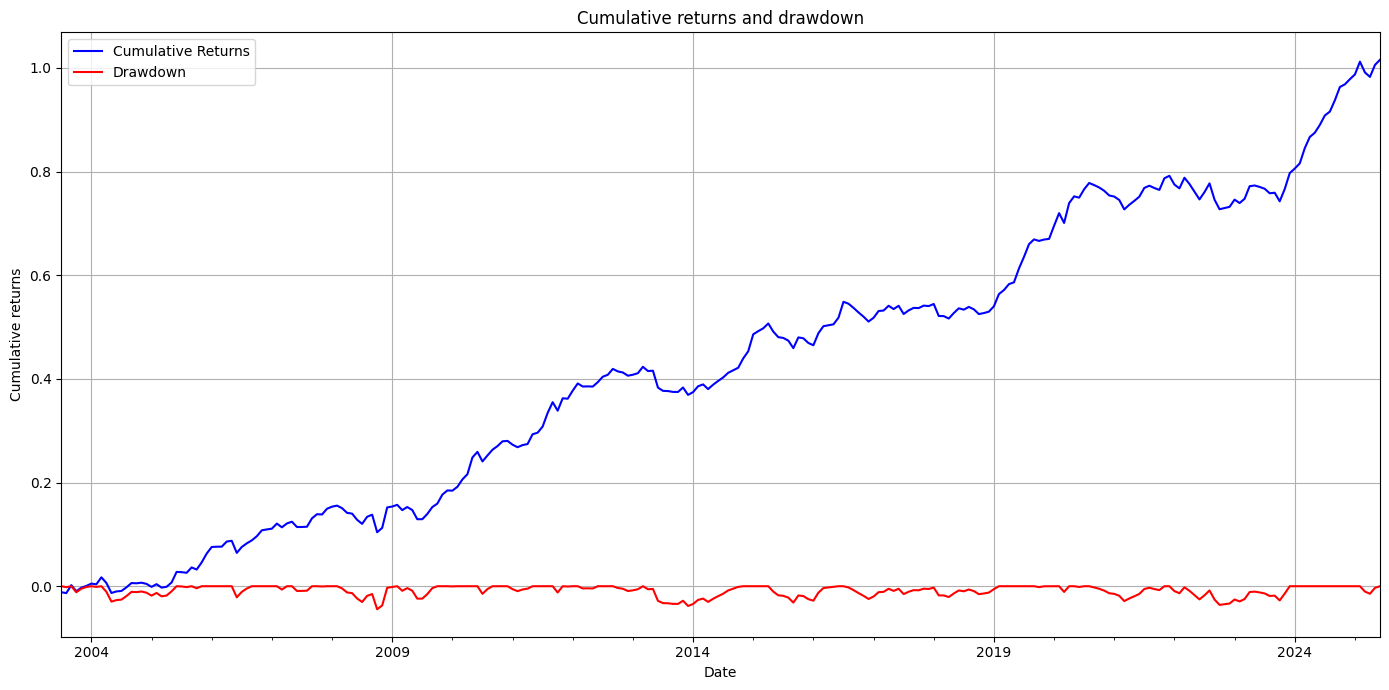

In [30]:
# Plot portfolio performance
fig, ax = plt.subplots(figsize=(14, 7))

(cumulative_returns - 1).plot(ax=ax, label="Cumulative Returns", color="blue")
drawdown.plot(ax=ax, label="Drawdown", color="red")

ax.set_title("Cumulative returns and drawdown")
ax.set_ylabel("Cumulative returns")
ax.set_xlabel("Date")
ax.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Comment on adding other commodities

"ES=F", "ZN=F", "GC=F", "DX=F"

("CL=F", "NG=F", "SI=F", "HG=F")

Adding these commodities increases overall volatility and riskiness of the portfolio while increasing the returns. Each statistics in section 8 gets worse value with the expanded portfolio (e.g. Calmar ratio goes from 0.7279 to 0.3934 which means significantly higher drawdowns relative to return), except for the mean annual return.

Expanded portolio could be optimized so that it would increase its volatility even more, increase its returns and improve the Calmar ratio (so we don't increase the risk unproportionally to the returns) and we could consider it our "risk porfolio for advanced investors" or something like that. Our original portfolio might then be a conservative version.